In [904]:
import pandas as pd
import numpy as np

In [905]:
df = pd.read_csv('../data/team_pitching/allpitching.csv')

In [906]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [907]:
df.dropna(subset=['Date'], inplace=True)

In [908]:
last_3 = lambda x: x.rolling(3).mean().shift(1)

In [909]:
last_10 = lambda x: x.rolling(10).mean().shift(1)

In [910]:
df[['IP_3', 'H_3', 'R_3', 'ER_3',
       'UER_3', 'BB_3', 'SO_3', 'HR_3', 'HBP_3', 'ERA_3', 'BF_3', 'Pit_3', 'Str_3', 'IR_3',
       'IS_3', 'SB_3', 'CS_3', 'AB_3', '2B_3', '3B_3', 'IBB_3', 'SH_3', 'SF_3', 'ROE_3']] = df[['IP', 'H', 'R', 'ER',
       'UER', 'BB', 'SO', 'HR', 'HBP', 'ERA', 'BF', 'Pit', 'Str', 'IR',
       'IS', 'SB', 'CS', 'AB', '2B', '3B', 'IBB', 'SH', 'SF', 'ROE']].apply(last_3)

In [911]:
df.to_csv('pitch_last_three.csv')

In [912]:
df1 = pd.read_csv('compressed_rows_games.csv')

In [913]:
df1.shape

(27276, 120)

In [915]:
df1.sort_values(by=['full_date', 'Umpire'], inplace=True)
team1 = df1.iloc[::2].copy()
team2 = df1.iloc[1::2].copy()
game_count = [i for i in range(1,13639)]
team1['game_id'] = game_count
team2['game_id'] = game_count
full_combined = pd.merge(team1, team2, on='game_id')

In [916]:
full_combined.to_csv('full_combined.csv')

In [917]:
team_codes = {
'LAD': '01',
'TBR': '02',    
'MIL': '03',
'SEA': '04',
'TOR': '05',
'LAA': '06',
'OAK': '07',
'HOU': '08',
'KCR': '09',
'BOS': '10',
'PHI': '11',
'ARI': '12',
'CHC': '13',
'ATL': '14',
'SFG': '15',
'COL': '16',
'NYM': '17',
'SDP': '18',
'TEX': '19',
'MIN': '20',
'NYY': '21',
'WSN': '22',
'STL': '23',
'BAL': '24',
'PIT': '25',
'CIN': '26',
'CLE': '27',
'CHW': '28',
'MIA': '29',
'DET': '30'
}

In [918]:
full_combined['team_1'] = full_combined['Opp_x_x'].map(team_codes)
full_combined['team_2'] = full_combined['Opp_x_y'].map(team_codes)

In [40]:
# full_combined['Unnamed: 2_x_x'] = full_combined['Unnamed: 2_x_x']

In [919]:
full_combined['Unnamed: 2_x_y'] = full_combined['Unnamed: 2_x_y'].fillna(1)
full_combined['Unnamed: 2_x_y'] = full_combined['Unnamed: 2_x_y'].map({'@': 0, 1: 1})


In [921]:
df3 = pd.read_csv('odds_cleaned.csv')


In [922]:
full_combined['full_date_y'] = pd.to_datetime(full_combined['full_date_y'])
full_combined['stats_join'] = full_combined['full_date_y'].apply(lambda x: x.strftime('%Y%m%d')) + full_combined['team_1'].astype(str) + full_combined['team_2'].astype(str)

In [923]:
full_combined['Home Team'] = np.where(full_combined['Unnamed: 2_x_y'] == 0, full_combined['Opp_x_y'], full_combined['Opp_x_x'])
# df['color'] = np.where(df['Set']=='Z', 'green', 'red')



In [924]:
full_combined['Away Team'] = np.where(full_combined['Unnamed: 2_x_y'] == 1, full_combined['Opp_x_y'], full_combined['Opp_x_x'])
# df['color'] = np.where(df['Set']=='Z', 'green', 'red')



In [925]:
full_combined['Home Code'] = full_combined['Home Team'].map(team_codes)

In [926]:
full_combined['Away Code'] = full_combined['Away Team'].map(team_codes)

In [927]:
full_combined['stats_join'] = full_combined['full_date_y'].apply(lambda x: x.strftime('%Y%m%d')) + full_combined['Home Code'].astype(str) + full_combined['Away Code'].astype(str)

In [1022]:
stats_odds = pd.merge(full_combined, df3, on='stats_join')

In [1023]:
stats_odds.to_csv('stats_odds.csv')

In [1024]:
stats_odds.columns.values

array(['Unnamed: 0_x', 'Unnamed: 0_x_x', 'Gtm_x_x', 'Date_x_x',
       'Unnamed: 2_x_x', 'Opp_x_x', 'Rslt_x_x', 'PA_x', 'AB_x_x', 'R_x_x',
       'H_x_x', '2B_x_x', '3B_x_x', 'HR_x_x', 'RBI_x', 'BB_x_x',
       'IBB_x_x', 'SO_x_x', 'HBP_x_x', 'SH_x_x', 'SF_x_x', 'ROE_x_x',
       'GDP_x_x', 'SB_x_x', 'CS_x_x', 'BA_x', 'OBP_x', 'SLG_x', 'OPS_x',
       'LOB_x', '#_x_x', 'Thr_x', 'Opp. Starter (GmeSc)_x', ' Year_x_x',
       'last_3_PA_x', 'last_3_AB_x', 'last_3_R_x', 'last_3_H_x',
       'last_3_2B_x', 'last_3_3B_x', 'last_3_HR_x', 'last_3_RBI_x',
       'last_3_BB_x', 'last_3_IBB_x', 'last_3_SO_x', 'last_3_HBP_x',
       'last_3_SH_x', 'last_3_SF_x', 'last_3_ROE_x', 'last_3_GDP_x',
       'last_3_SB_x', 'last_3_CS_x', 'last_3_BA_x', 'last_3_OBP_x',
       'last_3_SLG_x', 'last_3_OPS_x', 'last_3_LOB_x', 'last_3_#_x',
       'Unnamed: 0_y_x', 'Gtm_y_x', 'Date_y_x', 'Unnamed: 2_y_x',
       'Opp_y_x', 'Rslt_y_x', 'IP_x', 'H_y_x', 'R_y_x', 'ER_x', 'UER_x',
       'BB_y_x', 'SO_y_x', 'HR_y_

In [1025]:
stats_odds[['PA_x_last10', 'AB_x_xlast10', 'R_x_xlast10',
       'H_x_xlast10', '2B_x_xlast10', '3B_x_xlast10', 'HR_x_xlast10', 'RBI_xlast10', 'BB_x_xlast10',
       'IBB_x_xlast10', 'SO_x_xlast10', 'HBP_x_xlast10', 'SH_x_xlast10', 'SF_x_xlast10', 'ROE_x_xlast10',
       'GDP_x_xlast10', 'SB_x_xlast10', 'CS_x_xlast10', 'BA_xlast10', 'OBP_xlast10', 'SLG_xlast10', 'OPS_xlas10',
       'LOB_xlast10', '#_x_xlast10', 'PA_ylast10',
       'AB_x_ylast10', 'R_x_ylast10', 'H_x_ylast10', '2B_x_ylast10', '3B_x_ylast10', 'HR_x_ylast10', 'RBI_ylast10',
       'BB_x_ylast10', 'IBB_x_ylast10', 'SO_x_ylast10', 'HBP_x_ylast10', 'SH_x_ylast10', 'SF_x_ylast10',
       'ROE_x_ylast10', 'GDP_x_ylast10', 'SB_x_ylast10', 'CS_x_ylast10', 'BA_ylast10', 'OBP_ylast10', 'SLG_ylast10',
       'OPS_ylast10', 'LOB_ylast10', '#_x_ylast10' ]] = stats_odds[['PA_x', 'AB_x_x', 'R_x_x',
       'H_x_x', '2B_x_x', '3B_x_x', 'HR_x_x', 'RBI_x', 'BB_x_x',
       'IBB_x_x', 'SO_x_x', 'HBP_x_x', 'SH_x_x', 'SF_x_x', 'ROE_x_x',
       'GDP_x_x', 'SB_x_x', 'CS_x_x', 'BA_x', 'OBP_x', 'SLG_x', 'OPS_x',
       'LOB_x', '#_x_x', 'PA_y',
       'AB_x_y', 'R_x_y', 'H_x_y', '2B_x_y', '3B_x_y', 'HR_x_y', 'RBI_y',
       'BB_x_y', 'IBB_x_y', 'SO_x_y', 'HBP_x_y', 'SH_x_y', 'SF_x_y',
       'ROE_x_y', 'GDP_x_y', 'SB_x_y', 'CS_x_y', 'BA_y', 'OBP_y', 'SLG_y',
       'OPS_y', 'LOB_y', '#_x_y' ]].apply(last_10)

In [1026]:
stats_odds['result'] = np.where(stats_odds['Final_x'] - stats_odds['Final_y'] > 0, 0, 1)

In [1027]:
stats_odds.to_csv('stats_odds.csv')

In [1100]:
stats_odds1 = stats_odds.copy()

In [1101]:
stats_odds1.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_x_x', 'Gtm_x_x', 'Date_x_x',
       'Unnamed: 2_x_x', 'Opp_x_x', 'Rslt_x_x', 'PA_x', 'AB_x_x', 'R_x_x',
       'H_x_x', '2B_x_x', '3B_x_x', 'HR_x_x', 'RBI_x', 'BB_x_x',
       'IBB_x_x', 'SO_x_x', 'HBP_x_x', 'SH_x_x', 'SF_x_x', 'ROE_x_x',
       'GDP_x_x', 'SB_x_x', 'CS_x_x', 'BA_x', 'OBP_x', 'SLG_x', 'OPS_x',
       'LOB_x', '#_x_x', 'Thr_x', 'Opp. Starter (GmeSc)_x', ' Year_x_x', 'Unnamed: 0_y_x', 'Gtm_y_x', 'Date_y_x', 'Unnamed: 2_y_x',
       'Opp_y_x', 'Rslt_y_x', 'IP_x', 'H_y_x', 'R_y_x', 'ER_x', 'UER_x',
       'BB_y_x', 'SO_y_x', 'HR_y_x', 'HBP_y_x', 'ERA_x', 'BF_x', 'Pit_x',
       'Str_x', 'IR_x', 'IS_x', 'SB_y_x', 'CS_y_x', 'AB_y_x', '2B_y_x',
       '3B_y_x', 'IBB_y_x', 'SH_y_x', 'SF_y_x', 'ROE_y_x', 'GDP_y_x',
       '#_y_x', 'Umpire_x', 'Pitchers Used (Rest-GameScore-Dec)_x',
       ' Year_y_x', 'date_month_x', 'date_day_x', 'full_date_x',
       'game_id_x', 'Unnamed: 0_y', 'Unnamed: 0_x_y', 'Gtm_x_y',
       'Date_x_y', 'Unnamed: 2_x_y', 'Opp_x_y', 'Rslt_x_y', 'PA_y',
       'AB_x_y', 'R_x_y', 'H_x_y', '2B_x_y', '3B_x_y', 'HR_x_y', 'RBI_y',
       'BB_x_y', 'IBB_x_y', 'SO_x_y', 'HBP_x_y', 'SH_x_y', 'SF_x_y',
       'ROE_x_y', 'GDP_x_y', 'SB_x_y', 'CS_x_y', 'BA_y', 'OBP_y', 'SLG_y',
       'OPS_y', 'LOB_y', '#_x_y', 'Thr_y', 'Opp. Starter (GmeSc)_y',
       ' Year_x_y', 'Unnamed: 0_y_y', 'Gtm_y_y', 'Date_y_y',
       'Unnamed: 2_y_y', 'Opp_y_y', 'Rslt_y_y', 'IP_y', 'H_y_y', 'R_y_y',
       'ER_y', 'UER_y', 'BB_y_y', 'SO_y_y', 'HR_y_y', 'HBP_y_y', 'ERA_y',
       'BF_y', 'Pit_y', 'Str_y', 'IR_y', 'IS_y', 'SB_y_y', 'CS_y_y',
       'AB_y_y', '2B_y_y', '3B_y_y', 'IBB_y_y', 'SH_y_y', 'SF_y_y',
       'ROE_y_y', 'GDP_y_y', '#_y_y', 'Umpire_y',
       'Pitchers Used (Rest-GameScore-Dec)_y', ' Year_y_y','date_month_y',
       'date_day_y', 'full_date_y', 'team_1', 'team_2', 'stats_join',
       'Home Team_x', 'Away Team', 'Home Code_x', 'Away Code',
       'Unnamed: 0', 'Unnamed: 0.1', 'game_id_y', 'date', 'Visitor Team',
       'Visitor Pitcher', 'Home Team_y', 'Home Pitcher', 'date_month_y',
       'date_day_y', 'full_date_y', 'team_1', 'team_2', 'stats_join',
       'Home Team_x', 'Away Team', 'Home Code_x', 'Away Code',
       'Unnamed: 0', 'Unnamed: 0.1', 'game_id_y', 'date', 'Home Code_y',
       'Vis Code'], inplace=True)

In [1102]:
stats_odds1.columns.values

array(['last_3_PA_x', 'last_3_AB_x', 'last_3_R_x', 'last_3_H_x',
       'last_3_2B_x', 'last_3_3B_x', 'last_3_HR_x', 'last_3_RBI_x',
       'last_3_BB_x', 'last_3_IBB_x', 'last_3_SO_x', 'last_3_HBP_x',
       'last_3_SH_x', 'last_3_SF_x', 'last_3_ROE_x', 'last_3_GDP_x',
       'last_3_SB_x', 'last_3_CS_x', 'last_3_BA_x', 'last_3_OBP_x',
       'last_3_SLG_x', 'last_3_OPS_x', 'last_3_LOB_x', 'last_3_#_x',
       'IP_3_x', 'H_3_x', 'R_3_x', 'ER_3_x', 'UER_3_x', 'BB_3_x',
       'SO_3_x', 'HR_3_x', 'HBP_3_x', 'ERA_3_x', 'BF_3_x', 'Pit_3_x',
       'Str_3_x', 'IR_3_x', 'IS_3_x', 'SB_3_x', 'CS_3_x', 'AB_3_x',
       '2B_3_x', '3B_3_x', 'IBB_3_x', 'SH_3_x', 'SF_3_x', 'ROE_3_x',
       'last_3_PA_y', 'last_3_AB_y', 'last_3_R_y', 'last_3_H_y',
       'last_3_2B_y', 'last_3_3B_y', 'last_3_HR_y', 'last_3_RBI_y',
       'last_3_BB_y', 'last_3_IBB_y', 'last_3_SO_y', 'last_3_HBP_y',
       'last_3_SH_y', 'last_3_SF_y', 'last_3_ROE_y', 'last_3_GDP_y',
       'last_3_SB_y', 'last_3_CS_y', 'last_3_BA_

In [ ]:
# stats_odds1.to_csv('model_matrix.csv')

stats_odds1 = pd.read_csv('model_matrix.csv')

stats_odds1_16 = stats_odds1.iloc[:7419]

stats_odds1_17 = stats_odds1.iloc[7419:]

stats_odds1_16 = stats_odds1_16.dropna()

stats_odds1_17 = stats_odds1_17.dropna()

# stats_odds1_16.drop(columns=['Unnamed: 0', 'Final_x', 'Final_y'], inplace=True)

# stats_odds1_17.drop(columns=['Unnamed: 0', 'Final_x', 'Final_y'], inplace=True)

In [ ]:
stats_odds1_16.drop(columns=['IP_3_x', 'H_3_x', 'R_3_x', 'ER_3_x', 'UER_3_x', 'BB_3_x',
       'SO_3_x', 'HR_3_x', 'HBP_3_x', 'ERA_3_x', 'BF_3_x', 'Pit_3_x',
       'Str_3_x', 'IR_3_x', 'IS_3_x', 'SB_3_x', 'CS_3_x', 'AB_3_x',
       '2B_3_x', '3B_3_x', 'IBB_3_x', 'SH_3_x', 'SF_3_x', 'ROE_3_x', 'IP_3_y', 'H_3_y', 'R_3_y', 'ER_3_y', 'UER_3_y', 'BB_3_y',
       'SO_3_y', 'HR_3_y', 'HBP_3_y', 'ERA_3_y', 'BF_3_y', 'Pit_3_y',
       'Str_3_y', 'IR_3_y', 'IS_3_y', 'SB_3_y', 'CS_3_y', 'AB_3_y',
       '2B_3_y', '3B_3_y', 'IBB_3_y', 'SH_3_y', 'SF_3_y', 'ROE_3_y', 'Unnamed: 0', 'Final_x', 'Final_y'], inplace=True)

stats_odds1_17.drop(columns=['IP_3_x', 'H_3_x', 'R_3_x', 'ER_3_x', 'UER_3_x', 'BB_3_x',
       'SO_3_x', 'HR_3_x', 'HBP_3_x', 'ERA_3_x', 'BF_3_x', 'Pit_3_x',
       'Str_3_x', 'IR_3_x', 'IS_3_x', 'SB_3_x', 'CS_3_x', 'AB_3_x',
       '2B_3_x', '3B_3_x', 'IBB_3_x', 'SH_3_x', 'SF_3_x', 'ROE_3_x', 'IP_3_y', 'H_3_y', 'R_3_y', 'ER_3_y', 'UER_3_y', 'BB_3_y',
       'SO_3_y', 'HR_3_y', 'HBP_3_y', 'ERA_3_y', 'BF_3_y', 'Pit_3_y',
       'Str_3_y', 'IR_3_y', 'IS_3_y', 'SB_3_y', 'CS_3_y', 'AB_3_y',
       '2B_3_y', '3B_3_y', 'IBB_3_y', 'SH_3_y', 'SF_3_y', 'ROE_3_y', 'Unnamed: 0', 'Final_x', 'Final_y'], inplace=True)


In [ ]:
# stats_odds1_16.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
#        'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1'], inplace=True)
stats_odds1_17.drop(columns=['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1'], inplace=True)
stats_odds1_16.drop(columns=['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1'], inplace=True)

In [ ]:
stats_odds1_16.drop(columns=['Close Visitor ML', 'Home Close ML'], inplace=True)

In [ ]:
stats_odds1_17.drop(columns=['Close Visitor ML', 'Home Close ML'], inplace=True)

In [1035]:
# stats_odds1_17.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
#        'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1'], inplace=True)

### First model run, the moneylines are included which may be leakage

In [1108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [1109]:
y = stats_odds1_16.pop('result')

In [1038]:
# h_ml = stats_odds1_16.pop('Home Open ML')

In [1039]:
# v_ml = stats_odds1_16.pop('Open Visitor ML')

In [1110]:
X = stats_odds1_16

In [1111]:
X.shape

(6524, 102)

In [1112]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [1113]:
clf = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=10, n_jobs=-2)

In [1114]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1115]:
y_preds = clf.predict(X_test)

In [1116]:
clf.predict_proba(X_test)

array([[0.54058455, 0.45941545],
       [0.39408515, 0.60591485],
       [0.43875358, 0.56124642],
       ...,
       [0.38839473, 0.61160527],
       [0.59165967, 0.40834033],
       [0.51707656, 0.48292344]])

In [1117]:
from sklearn import metrics

In [1118]:
from sklearn.model_selection import cross_val_score

In [1119]:
print("Accuracy:",metrics.accuracy_score(y_test, y_preds))

Accuracy: 0.5622317596566524


In [1120]:
np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy'))

0.5663149323472911

In [1161]:
X.head()

,last_3_PA_x,last_3_AB_x,last_3_R_x,last_3_H_x,last_3_2B_x,last_3_3B_x,last_3_HR_x,last_3_RBI_x,last_3_BB_x,last_3_IBB_x,last_3_SO_x,last_3_HBP_x,last_3_SH_x,last_3_SF_x,last_3_ROE_x,last_3_GDP_x,last_3_SB_x,last_3_CS_x,last_3_BA_x,last_3_OBP_x,last_3_SLG_x,last_3_OPS_x,last_3_LOB_x,last_3_#_x,last_3_PA_y,last_3_AB_y,last_3_R_y,last_3_H_y,last_3_2B_y,last_3_3B_y,last_3_HR_y,last_3_RBI_y,last_3_BB_y,last_3_IBB_y,last_3_SO_y,last_3_HBP_y,last_3_SH_y,last_3_SF_y,last_3_ROE_y,last_3_GDP_y,last_3_SB_y,last_3_CS_y,last_3_BA_y,last_3_OBP_y,last_3_SLG_y,last_3_OPS_y,last_3_LOB_y,last_3_#_y,Open Visitor ML,Home Open ML,Visitor RL,Visitor RL Price,Home RL,Home RL Price,PA_x_last10,AB_x_xlast10,R_x_xlast10,H_x_xlast10,2B_x_xlast10,3B_x_xlast10,HR_x_xlast10,RBI_xlast10,BB_x_xlast10,IBB_x_xlast10,SO_x_xlast10,HBP_x_xlast10,SH_x_xlast10,SF_x_xlast10,ROE_x_xlast10,GDP_x_xlast10,SB_x_xlast10,CS_x_xlast10,BA_xlast10,OBP_xlast10,SLG_xlast10,OPS_xlas10,LOB_xlast10,#_x_xlast10,PA_ylast10,AB_x_ylast10,R_x_ylast10,H_x_ylast10,2B_x_ylast10,3B_x_ylast10,HR_x_ylast10,RBI_ylast10,BB_x_ylast10,IBB_x_ylast10,SO_x_ylast10,HBP_x_ylast10,SH_x_ylast10,SF_x_ylast10,ROE_x_ylast10,GDP_x_ylast10,SB_x_ylast10,CS_x_ylast10,BA_ylast10,OBP_ylast10,SLG_ylast10,OPS_ylast10,LOB_ylast10,#_x_ylast10,prob_0,prob_1,y_preds,result,Visitors Odds Prob,Home Odds Prob,max_model_prob,max_odds_prob,potential edge,wager,Home Payout,Visitor Payout,incorrect,payout
7419,37.000000,32.666667,3.333333,8.333333,1.333333,0.000000,0.666667,3.333333,3.666667,0.0,7.666667,0.000000,0.000000,0.333333,0.000000,0.666667,0.666667,0.333333,0.252000,0.314667,0.405333,0.719667,7.666667,13.000000,38.666667,36.000000,3.666667,7.333333,3.333333,0.0,0.333333,3.333333,2.000000,0.0,8.333333,0.333333,0.000000,0.333333,1.333333,0.333333,0.333333,0.333333,0.243000,0.307000,0.425667,0.733000,7.000000,10.000000,-120,110,-1.5,151,1.5,-175,38.5,35.1,3.9,9.8,2.0,0.2,0.7,3.8,2.6,0.3,9.8,0.3,0.3,0.2,0.1,0.9,0.3,0.6,0.2645,0.3217,0.4217,0.7435,7.5,15.2,39.0,34.3,5.0,9.1,2.0,0.2,0.9,4.8,3.5,0.0,8.9,0.3,0.2,0.7,0.4,0.4,0.8,0.2,0.2593,0.3258,0.4389,0.7647,7.3,14.7,0.606919,0.393081,0,1,0.545455,0.476190,60.691923,54.545455,6.146469,10,21.000000,18.333333,1,0.000000
7420,39.000000,33.666667,6.000000,8.333333,1.666667,0.000000,1.666667,6.000000,5.333333,0.0,8.333333,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.333333,0.256000,0.343000,0.428667,0.771667,6.000000,18.000000,37.666667,32.666667,7.000000,10.000000,2.333333,0.0,1.666667,6.333333,3.666667,0.0,6.333333,0.333333,0.000000,1.000000,1.333333,1.333333,0.000000,0.000000,0.254667,0.324667,0.442000,0.766667,6.666667,17.333333,-125,110,-1.5,135,1.5,-155,38.9,35.6,3.9,10.0,1.9,0.2,0.6,3.8,2.3,0.3,9.7,0.4,0.3,0.3,0.2,0.6,0.3,0.6,0.2649,0.3195,0.4100,0.7296,7.9,15.4,39.7,34.7,5.5,9.8,2.0,0.2,1.1,5.2,3.7,0.0,8.9,0.3,0.2,0.8,0.4,0.3,0.9,0.2,0.2695,0.3332,0.4542,0.7874,7.8,14.5,0.501961,0.498039,0,1,0.555556,0.476190,50.196060,55.555556,-5.359496,10,21.000000,18.000000,1,0.000000
7421,36.000000,32.000000,3.000000,6.333333,1.000000,0.333333,0.666667,2.333333,3.666667,0.0,6.000000,0.333333,0.000000,0.000000,0.333333,0.666667,0.333333,0.000000,0.282667,0.348667,0.462333,0.811333,7.000000,11.000000,36.000000,33.666667,2.333333,7.000000,0.000000,0.0,0.666667,2.333333,2.333333,0.0,11.666667,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.333333,0.257333,0.332333,0.402333,0.735000,6.666667,15.333333,145,-165,1.5,-155,-1.5,135,39.5,36.2,4.1,10.2,2.0,0.2,0.7,4.0,2.2,0.2,9.9,0.6,0.3,0.2,0.2,0.6,0.2,0.6,0.2629,0.3152,0.4069,0.7222,8.0,15.7,40.9,35.1,5.9,10.4,2.1,0.2,1.2,5.6,4.4,0.1,8.2,0.3,0.2,0.9,0.4,0.4,1.1,0.2,0.2742,0.3433,0.4561,0.7994,8.7,14.6,0.442989,0.557011,1,1,0.408163,0.622642,55.701101,62.264151,-6.563050,10,16.060606,24.500000,0,16.060606
7422,39.000000,34.333333,5.333333,8.666667,1.333333,0.000000,2.000000,5.333333,4.333333,0.0,7.666667,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.666667,0.256000,0.317000,0.443333,0.760667,6.666667,10.333333,

In [1121]:
list(zip(X, clf.feature_importances_))

[('last_3_PA_x', 0.0104865931288569),
 ('last_3_AB_x', 0.011242566628587514),
 ('last_3_R_x', 0.008972588649765731),
 ('last_3_H_x', 0.009856176464414262),
 ('last_3_2B_x', 0.007027646381951509),
 ('last_3_3B_x', 0.0027885425410578866),
 ('last_3_HR_x', 0.007759127552025548),
 ('last_3_RBI_x', 0.008239489040818799),
 ('last_3_BB_x', 0.007864787994998554),
 ('last_3_IBB_x', 0.0028297252591600046),
 ('last_3_SO_x', 0.010824988241226179),
 ('last_3_HBP_x', 0.003607378027668285),
 ('last_3_SH_x', 0.002976913213344679),
 ('last_3_SF_x', 0.003926181226799197),
 ('last_3_ROE_x', 0.00434179848344338),
 ('last_3_GDP_x', 0.00702480840293404),
 ('last_3_SB_x', 0.005143382760260154),
 ('last_3_CS_x', 0.0038285030317783443),
 ('last_3_BA_x', 0.016097486338194716),
 ('last_3_OBP_x', 0.014921684031772424),
 ('last_3_SLG_x', 0.013545904407249681),
 ('last_3_OPS_x', 0.01407485039958083),
 ('last_3_LOB_x', 0.010563750257847013),
 ('last_3_#_x', 0.010174903078674696),
 ('last_3_PA_y', 0.01132930511837955

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

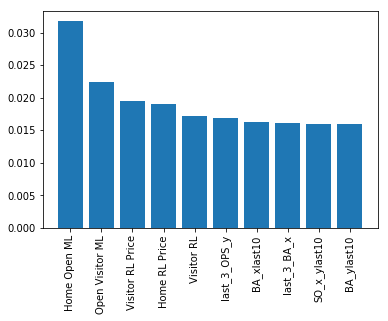

In [1122]:
feature_import = list(zip(X, clf.feature_importances_))
feature_import.sort(key=lambda x: x[1], reverse=True)
feature_import = feature_import[:10]
plt.bar(*zip(*feature_import))
plt.xticks(rotation='vertical')

In [1123]:
feature_import

[('Home Open ML', 0.03178881291541904),
 ('Open Visitor ML', 0.02246781909558597),
 ('Visitor RL Price', 0.019537198422336918),
 ('Home RL Price', 0.019060225164121754),
 ('Visitor RL', 0.0171898739263234),
 ('last_3_OPS_y', 0.016870945251015908),
 ('BA_xlast10', 0.016354200500319865),
 ('last_3_BA_x', 0.016097486338194716),
 ('SO_x_ylast10', 0.016021262241670286),
 ('BA_ylast10', 0.015963198066843442)]

In [1124]:
len(clf.feature_importances_)

102

#### Test on 2017

In [1125]:
y = stats_odds1_17.pop('result')

In [1055]:
# v_ml = stats_odds1_17.pop('Open Visitor ML')

In [1056]:
# h_ml = stats_odds1_17.pop('Home Open ML')

In [1126]:
X = stats_odds1_17

In [1127]:

y_preds = clf.predict(X)


In [334]:
# X = X.drop(columns=['result', 'y_preds'])

In [1128]:
probs = clf.predict_proba(X)

In [1129]:
print("Accuracy:",metrics.accuracy_score(y, y_preds))

Accuracy: 0.5658409387222947


In [979]:
# np.mean(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy'))

##### Comparing y_preds, pred_proba, result and odds

In [1130]:
X['prob_0'] = probs[:,0] 
X['prob_1'] = probs[:,1]

In [1131]:
X['y_preds'] = y_preds

In [1132]:
X['result'] = y

In [1133]:
# X['Home Open ML'] = h_ml
# X['Open Visitor ML'] = v_ml
X['Visitors Odds Prob'] = X['Open Visitor ML'].apply(lambda x: abs(x)/(abs(x) + 100) if x < 100 else 100/(x+100))
X['Home Odds Prob'] = X['Home Open ML'].apply(lambda x: abs(x)/(abs(x) + 100) if x < 100 else 100/(x+100))


In [1134]:
X['max_model_prob'] = X[["prob_0", "prob_1"]].max(axis=1) * 100

In [1135]:
X['max_odds_prob'] = X[['Visitors Odds Prob', 'Home Odds Prob']].max(axis=1) * 100

In [1136]:
X['potential edge'] = X['max_model_prob'] - X['max_odds_prob']

In [1137]:
X['wager'] = X['potential edge'].apply(lambda x: 10 if x > 0 else 0)

In [1138]:
# X['payout'] = X['wager'].apply(lambda x: x * (X['Home Open ML'] )if (X['y_preds'] - X['result'] == 0) & (X['y_preds'] == 1) else -10)

X['Home Payout'] = X['Home Open ML'].apply(lambda x: (100/abs(x) + 1) if x < 100 else (x/100 + 1))                               
X['Visitor Payout'] = X['Open Visitor ML'].apply(lambda x: (100/abs(x) + 1) if x < 100 else (x/100 + 1))        
X['Home Payout'] = X['Home Open ML'].apply(lambda x: (100/abs(x) + 1)*10 if x < 100 else (x/100 + 1)*10)                               
X['Visitor Payout'] = X['Open Visitor ML'].apply(lambda x: (100/abs(x) + 1)*10 if x < 100 else (x/100 + 1)*10)                              
                               

In [1139]:
# X['payout'] = np.where(((X['y_preds'] - X['result'] == 0) & (X['y_preds'] == 1)), X['Home Payout Ratio']*X['wager'], (np.where(((X['y_preds'] - X['result'] == 0) & (X['y_preds'] == 0)), X['wager']*X['Visitor Payout Ratio'], -10)))
X['incorrect'] = abs(X['y_preds'] - X['result'])


In [1140]:
# X['payout'] = np.where((X['incorrect'] = 0 & (X['y_preds'] == 1)), X['Home Payout Ratio']*X['wager'], (np.where((X['incorrect'] = 0 & X['y_preds'] == 0, X['Visitor Payout Ratio']*X['wager'], -10)))

X.head()



,last_3_PA_x,last_3_AB_x,last_3_R_x,last_3_H_x,last_3_2B_x,last_3_3B_x,last_3_HR_x,last_3_RBI_x,last_3_BB_x,last_3_IBB_x,last_3_SO_x,last_3_HBP_x,last_3_SH_x,last_3_SF_x,last_3_ROE_x,last_3_GDP_x,last_3_SB_x,last_3_CS_x,last_3_BA_x,last_3_OBP_x,last_3_SLG_x,last_3_OPS_x,last_3_LOB_x,last_3_#_x,last_3_PA_y,last_3_AB_y,last_3_R_y,last_3_H_y,last_3_2B_y,last_3_3B_y,last_3_HR_y,last_3_RBI_y,last_3_BB_y,last_3_IBB_y,last_3_SO_y,last_3_HBP_y,last_3_SH_y,last_3_SF_y,last_3_ROE_y,last_3_GDP_y,last_3_SB_y,last_3_CS_y,last_3_BA_y,last_3_OBP_y,last_3_SLG_y,last_3_OPS_y,last_3_LOB_y,last_3_#_y,Open Visitor ML,Home Open ML,Visitor RL,Visitor RL Price,Home RL,Home RL Price,PA_x_last10,AB_x_xlast10,R_x_xlast10,H_x_xlast10,2B_x_xlast10,3B_x_xlast10,HR_x_xlast10,RBI_xlast10,BB_x_xlast10,IBB_x_xlast10,SO_x_xlast10,HBP_x_xlast10,SH_x_xlast10,SF_x_xlast10,ROE_x_xlast10,GDP_x_xlast10,SB_x_xlast10,CS_x_xlast10,BA_xlast10,OBP_xlast10,SLG_xlast10,OPS_xlas10,LOB_xlast10,#_x_xlast10,PA_ylast10,AB_x_ylast10,R_x_ylast10,H_x_ylast10,2B_x_ylast10,3B_x_ylast10,HR_x_ylast10,RBI_ylast10,BB_x_ylast10,IBB_x_ylast10,SO_x_ylast10,HBP_x_ylast10,SH_x_ylast10,SF_x_ylast10,ROE_x_ylast10,GDP_x_ylast10,SB_x_ylast10,CS_x_ylast10,BA_ylast10,OBP_ylast10,SLG_ylast10,OPS_ylast10,LOB_ylast10,#_x_ylast10,prob_0,prob_1,y_preds,result,Visitors Odds Prob,Home Odds Prob,max_model_prob,max_odds_prob,potential edge,wager,Home Payout,Visitor Payout,incorrect
7419,37.000000,32.666667,3.333333,8.333333,1.333333,0.000000,0.666667,3.333333,3.666667,0.0,7.666667,0.000000,0.000000,0.333333,0.000000,0.666667,0.666667,0.333333,0.252000,0.314667,0.405333,0.719667,7.666667,13.000000,38.666667,36.000000,3.666667,7.333333,3.333333,0.0,0.333333,3.333333,2.000000,0.0,8.333333,0.333333,0.000000,0.333333,1.333333,0.333333,0.333333,0.333333,0.243000,0.307000,0.425667,0.733000,7.000000,10.000000,-120,110,-1.5,151,1.5,-175,38.5,35.1,3.9,9.8,2.0,0.2,0.7,3.8,2.6,0.3,9.8,0.3,0.3,0.2,0.1,0.9,0.3,0.6,0.2645,0.3217,0.4217,0.7435,7.5,15.2,39.0,34.3,5.0,9.1,2.0,0.2,0.9,4.8,3.5,0.0,8.9,0.3,0.2,0.7,0.4,0.4,0.8,0.2,0.2593,0.3258,0.4389,0.7647,7.3,14.7,0.606919,0.393081,0,1,0.545455,0.476190,60.691923,54.545455,6.146469,10,21.000000,18.333333,1
7420,39.000000,33.666667,6.000000,8.333333,1.666667,0.000000,1.666667,6.000000,5.333333,0.0,8.333333,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.333333,0.256000,0.343000,0.428667,0.771667,6.000000,18.000000,37.666667,32.666667,7.000000,10.000000,2.333333,0.0,1.666667,6.333333,3.666667,0.0,6.333333,0.333333,0.000000,1.000000,1.333333,1.333333,0.000000,0.000000,0.254667,0.324667,0.442000,0.766667,6.666667,17.333333,-125,110,-1.5,135,1.5,-155,38.9,35.6,3.9,10.0,1.9,0.2,0.6,3.8,2.3,0.3,9.7,0.4,0.3,0.3,0.2,0.6,0.3,0.6,0.2649,0.3195,0.4100,0.7296,7.9,15.4,39.7,34.7,5.5,9.8,2.0,0.2,1.1,5.2,3.7,0.0,8.9,0.3,0.2,0.8,0.4,0.3,0.9,0.2,0.2695,0.3332,0.4542,0.7874,7.8,14.5,0.501961,0.498039,0,1,0.555556,0.476190,50.196060,55.555556,-5.359496,0,21.000000,18.000000,1
7421,36.000000,32.000000,3.000000,6.333333,1.000000,0.333333,0.666667,2.333333,3.666667,0.0,6.000000,0.333333,0.000000,0.000000,0.333333,0.666667,0.333333,0.000000,0.282667,0.348667,0.462333,0.811333,7.000000,11.000000,36.000000,33.666667,2.333333,7.000000,0.000000,0.0,0.666667,2.333333,2.333333,0.0,11.666667,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.333333,0.257333,0.332333,0.402333,0.735000,6.666667,15.333333,145,-165,1.5,-155,-1.5,135,39.5,36.2,4.1,10.2,2.0,0.2,0.7,4.0,2.2,0.2,9.9,0.6,0.3,0.2,0.2,0.6,0.2,0.6,0.2629,0.3152,0.4069,0.7222,8.0,15.7,40.9,35.1,5.9,10.4,2.1,0.2,1.2,5.6,4.4,0.1,8.2,0.3,0.2,0.9,0.4,0.4,1.1,0.2,0.2742,0.3433,0.4561,0.7994,8.7,14.6,0.442989,0.557011,1,1,0.408163,0.622642,55.701101,62.264151,-6.563050,0,16.060606,24.500000,0
7422,39.000000,34.333333,5.333333,8.666667,1.333333,0.000000,2.000000,5.333333,4.333333,0.0,7.666667,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.666667,0.256000,0.317000,0.443333,0.760667,6.666667,10.333333,39.333333,32.666667,3.000000,7.666667

In [1141]:
X['incorrect'] = np.where(X['result'] == X['y_preds'], 0, 1)

In [1142]:
conditions = [
    (X['incorrect'] == 0) & (X['y_preds'] == 0) & (X['wager'] == 10),
    (X['incorrect'] == 0) & (X['y_preds'] == 1) & (X['wager'] == 10),
    (X['incorrect'] == 1) & (X['wager'] == 10),
    (X['incorrect'] == 1) & (X['wager'] == 0)]
choices = [X['Visitor Payout'], X['Home Payout'], 0, 0]
X['payout'] = np.select(conditions, choices)

In [1157]:
X['wager'] =10

In [1153]:
X['wager'] = X['potential edge'].apply(lambda x: 10 if x > 1 else 0)

In [1158]:
conditions = [
    (X['incorrect'] == 0) & (X['y_preds'] == 0) & (X['wager'] == 10),
    (X['incorrect'] == 0) & (X['y_preds'] == 1) & (X['wager'] == 10),
    (X['incorrect'] == 1) & (X['wager'] == 10),
    (X['incorrect'] == 1) & (X['wager'] == 0)]
choices = [X['Visitor Payout'], X['Home Payout'], 0, 0]
X['payout'] = np.select(conditions, choices)

In [1159]:
X['payout'].sum()

22494.299357024636

In [1160]:
X['wager'].sum()

23010

In [1079]:
12643 / 12510 - 1

0.010631494804156594

In [731]:
X['incorrect'].value_counts()

0    1288
1    1013
Name: incorrect, dtype: int64

##### What if we just guessed the home team every time?

In [866]:
X['payout'].sum() ####just guessing home

22575.411030663796

In [867]:
X['wager'].sum()

23010

In [869]:
22575 / 23010 - 1

-0.01890482398956972

In [450]:
print("Accuracy:",metrics.accuracy_score(X['result'], X['y_preds']))

Accuracy: 0.5536723163841808


### Forgot to take out the score from above - no wonder the accuracy was so high

#### Model Run 2

In [67]:
stats_odds1_16.drop(columns=['Final_x', 'Final_y'], inplace=True)

In [68]:
stats_odds1_17.drop(columns=['Final_x', 'Final_y'], inplace=True)

In [69]:
y = stats_odds1_16.pop('result')

In [70]:
X = stats_odds1_16

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [72]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-2)

In [73]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
y_preds = clf.predict(X_test)

In [75]:
clf.predict_proba(X_test)

array([[0.43875406, 0.56124594],
       [0.44610367, 0.55389633],
       [0.4068836 , 0.5931164 ],
       ...,
       [0.38819684, 0.61180316],
       [0.40492277, 0.59507723],
       [0.41697723, 0.58302277]])

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_preds))

Accuracy: 0.5725658297611758


In [77]:
list(zip(X, clf.feature_importances_))

[('last_3_PA_x', 0.010403182712589049),
 ('last_3_AB_x', 0.011671837923255199),
 ('last_3_R_x', 0.010701053592611918),
 ('last_3_H_x', 0.011327094702883535),
 ('last_3_2B_x', 0.008213891445159868),
 ('last_3_3B_x', 0.002977678266216792),
 ('last_3_HR_x', 0.008770396994825166),
 ('last_3_RBI_x', 0.01042596948918933),
 ('last_3_BB_x', 0.010393833365000653),
 ('last_3_IBB_x', 0.0031336557154252953),
 ('last_3_SO_x', 0.011282994728615315),
 ('last_3_HBP_x', 0.0040829137419299),
 ('last_3_SH_x', 0.004812553524959517),
 ('last_3_SF_x', 0.003813472067187601),
 ('last_3_ROE_x', 0.004392075135684509),
 ('last_3_GDP_x', 0.006198728582420019),
 ('last_3_SB_x', 0.006423267425372152),
 ('last_3_CS_x', 0.002969675653810592),
 ('last_3_BA_x', 0.014229723958506395),
 ('last_3_OBP_x', 0.015348965496806305),
 ('last_3_SLG_x', 0.014214191141343218),
 ('last_3_OPS_x', 0.013945669928359567),
 ('last_3_LOB_x', 0.012528534134540394),
 ('last_3_#_x', 0.01115445756109165),
 ('IP_3_x', 0.007174577176654572),
 (

In [82]:
np.unique(y_preds, return_counts=True)

(array([0, 1]), array([ 513, 1120]))

#### Model 3 - without moneylines included

In [84]:
X.drop(columns=['Open Visitor ML', 'Close Visitor ML', 'Home Open ML', 'Home Close ML'], inplace=True)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [86]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-2)

In [87]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
y_preds = clf.predict(X_test)

In [89]:
clf.predict_proba(X_test)

array([[0.44285788, 0.55714212],
       [0.47391151, 0.52608849],
       [0.54286383, 0.45713617],
       ...,
       [0.38852137, 0.61147863],
       [0.42794484, 0.57205516],
       [0.50872871, 0.49127129]])

In [90]:
print("Accuracy:",metrics.accuracy_score(y_test, y_preds))

Accuracy: 0.5707287201469687


In [220]:
feature_import = list(zip(X, clf.feature_importances_))
# feature_import = clf.feature_importances_.tolist()

#### Model 4 - Limit Features to 10  w/o MoneyLines

In [92]:
clf = RandomForestClassifier(n_estimators=100, max_features = X.shape[1]//3, max_depth=10, n_jobs=-2)

In [93]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
y_preds = clf.predict(X_test)

In [104]:
probs = clf.predict_proba(X_test)

In [96]:
print("Accuracy:",metrics.accuracy_score(y_test, y_preds))

Accuracy: 0.5670545009185548


In [183]:
stats_odds = pd.read_csv('stats_odds.csv')

In [184]:
stats_odds4 = stats_odds.iloc[:7419]


In [185]:
type(stats_odds4)

pandas.core.frame.DataFrame

In [187]:
stats_odds4.dropna().shape

(0, 270)

In [188]:
X.head()

,last_3_PA_x,last_3_AB_x,last_3_R_x,last_3_H_x,last_3_2B_x,last_3_3B_x,last_3_HR_x,last_3_RBI_x,last_3_BB_x,last_3_IBB_x,last_3_SO_x,last_3_HBP_x,last_3_SH_x,last_3_SF_x,last_3_ROE_x,last_3_GDP_x,last_3_SB_x,last_3_CS_x,last_3_BA_x,last_3_OBP_x,last_3_SLG_x,last_3_OPS_x,last_3_LOB_x,last_3_#_x,IP_3_x,H_3_x,R_3_x,ER_3_x,UER_3_x,BB_3_x,SO_3_x,HR_3_x,HBP_3_x,ERA_3_x,BF_3_x,Pit_3_x,Str_3_x,IR_3_x,IS_3_x,SB_3_x,CS_3_x,AB_3_x,2B_3_x,3B_3_x,IBB_3_x,SH_3_x,SF_3_x,ROE_3_x,last_3_PA_y,last_3_AB_y,last_3_R_y,last_3_H_y,last_3_2B_y,last_3_3B_y,last_3_HR_y,last_3_RBI_y,last_3_BB_y,last_3_IBB_y,last_3_SO_y,last_3_HBP_y,last_3_SH_y,last_3_SF_y,last_3_ROE_y,last_3_GDP_y,last_3_SB_y,last_3_CS_y,last_3_BA_y,last_3_OBP_y,last_3_SLG_y,last_3_OPS_y,last_3_LOB_y,last_3_#_y,IP_3_y,H_3_y,R_3_y,ER_3_y,UER_3_y,BB_3_y,SO_3_y,HR_3_y,HBP_3_y,ERA_3_y,BF_3_y,Pit_3_y,Str_3_y,IR_3_y,IS_3_y,SB_3_y,CS_3_y,AB_3_y,2B_3_y,3B_3_y,IBB_3_y,SH_3_y,SF_3_y,ROE_3_y,Visitor RL,Visitor RL Price,Home RL,Home RL Price
2,41.000000,34.666667,6.333333,10.000000,2.666667,0.333333,1.666667,6.000000,4.000000,0.000000,9.000000,1.000000,0.333333,1.000000,0.666667,0.333333,0.333333,0.000000,0.227000,0.321333,0.378000,0.699667,7.666667,14.000000,9.000000,8.333333,3.000000,3.000000,0.0,5.000000,9.333333,0.333333,0.000000,2.966667,40.000000,166.666667,103.333333,3.000000,0.333333,0.000000,0.333333,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.666667,39.000000,35.333333,2.333333,8.666667,3.000000,0.000000,0.000000,2.000000,2.333333,1.000000,7.666667,1.000000,0.333333,0.000000,0.000000,0.333333,0.666667,0.333333,0.268667,0.324333,0.430000,0.754333,8.666667,15.333333,9.666667,8.000000,3.000000,2.666667,0.333333,3.333333,9.333333,0.666667,1.000000,4.963333,40.333333,166.666667,108.666667,1.666667,0.000000,0.000000,0.000000,36.000000,1.666667,0.000000,0.000000,0.000000,0.000000,0.000000,-1.5,150,1.5,-170
3,36.333333,33.333333,5.666667,8.000000,1.666667,0.333333,1.333333,5.000000,2.333333,0.000000,10.333333,0.000000,0.000000,0.666667,0.666667,1.333333,1.666667,0.333333,0.243667,0.318000,0.402333,0.720000,3.666667,15.333333,8.666667,10.666667,5.000000,5.000000,0.0,3.333333,9.666667,1.333333,0.666667,4.103333,39.000000,155.000000,97.666667,1.666667,0.000000,0.333333,0.333333,35.000000,2.000000,0.000000,0.333333,0.000000,0.000000,0.000000,35.333333,33.333333,2.333333,6.000000,0.666667,0.000000,1.666667,2.333333,2.000000,0.000000,13.666667,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.250000,0.323667,0.442667,0.766667,6.000000,10.333333,8.000000,9.000000,5.000000,5.000000,0.000000,1.666667,9.666667,3.000000,0.666667,5.036667,34.333333,134.000000,86.000000,1.000000,0.000000,0.333333,0.000000,32.000000,1.666667,0.000000,0.000000,0.000000,0.000000,0.000000,1.5,-155,-1.5,135
4,34.333333,32.000000,4.333333,8.000000,1.666667,0.333333,1.000000,4.000000,2.333333,0.333333,9.666667,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.255333,0.336667,0.456333,0.793000,5.000000,14.000000,9.000000,9.333333,5.000000,5.000000,0.0,3.666667,8.333333,2.000000,0.333333,4.050000,40.000000,155.000000,96.666667,0.666667,0.666667,0.333333,0.333333,34.666667,2.000000,0.000000,0.000000,0.666667,0.666667,0.333333,40.000000,35.666667,7.333333,10.000000,3.333333,0.333333,1.666667,7.333333,4.333333,0.666667,10.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667,0.249000,0.328000,0.451667,0.779667,5.666667,16.000000,8.666667,8.333333,5.666667,5.333333,0.333333,5.333333,9.666667,1.000000,0.000000,4.593333,38.666667,156.333333,98.666667,1.333333,0.666667,0.333333,0.000000,32.333333,3.000000,0.666667,0.666667,0.333333,0.666667,0.333333,1.5,-145,-1.5,125
5,39.666667,34.000000,4.666667,10.333333,1.666667,0.000000,1.000000,4.666667,5.333333,0.333333,9.333333,0.333333,0.000000,0.000000,0.333333,0.333333,2.333333,0.666667,0.261667,0.336333,0.457000,0.793333,10.000000,15.000000,9.000000,8.333333,3.000000,3.000000,0.0,2.000000,8.000000,0.666667,0.000000,4.273333,36.000000,125.

In [189]:
X.shape

(6532, 100)

In [190]:
probs.shape

(1633, 2)

In [191]:
y_preds.shape

(1633,)

In [ ]:
y.preds.r

In [192]:
y.shape

(6532,)

In [193]:
X_test.shape

(1633, 100)

In [194]:
X_test.columns.values

array(['last_3_PA_x', 'last_3_AB_x', 'last_3_R_x', 'last_3_H_x',
       'last_3_2B_x', 'last_3_3B_x', 'last_3_HR_x', 'last_3_RBI_x',
       'last_3_BB_x', 'last_3_IBB_x', 'last_3_SO_x', 'last_3_HBP_x',
       'last_3_SH_x', 'last_3_SF_x', 'last_3_ROE_x', 'last_3_GDP_x',
       'last_3_SB_x', 'last_3_CS_x', 'last_3_BA_x', 'last_3_OBP_x',
       'last_3_SLG_x', 'last_3_OPS_x', 'last_3_LOB_x', 'last_3_#_x',
       'IP_3_x', 'H_3_x', 'R_3_x', 'ER_3_x', 'UER_3_x', 'BB_3_x',
       'SO_3_x', 'HR_3_x', 'HBP_3_x', 'ERA_3_x', 'BF_3_x', 'Pit_3_x',
       'Str_3_x', 'IR_3_x', 'IS_3_x', 'SB_3_x', 'CS_3_x', 'AB_3_x',
       '2B_3_x', '3B_3_x', 'IBB_3_x', 'SH_3_x', 'SF_3_x', 'ROE_3_x',
       'last_3_PA_y', 'last_3_AB_y', 'last_3_R_y', 'last_3_H_y',
       'last_3_2B_y', 'last_3_3B_y', 'last_3_HR_y', 'last_3_RBI_y',
       'last_3_BB_y', 'last_3_IBB_y', 'last_3_SO_y', 'last_3_HBP_y',
       'last_3_SH_y', 'last_3_SF_y', 'last_3_ROE_y', 'last_3_GDP_y',
       'last_3_SB_y', 'last_3_CS_y', 'last_3_BA_

In [ ]:
#### should be able to do X_test ML with 

In [198]:
X_test['test'] = 1

/Users/gregnoble/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [200]:
X_test['preds'] = y_preds


/Users/gregnoble/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [208]:
probability_1 = clf.predict_proba(X_test)[:,1]
probability_0 = clf.predict_proba(X_test)[:,0]

ValueError: Number of features of the model must match the input. Model n_features is 100 and input n_features is 102 

In [209]:
X_test['probs'] = 0

/Users/gregnoble/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,last_3_PA_x,last_3_AB_x,last_3_R_x,last_3_H_x,last_3_2B_x,last_3_3B_x,last_3_HR_x,last_3_RBI_x,last_3_BB_x,last_3_IBB_x,last_3_SO_x,last_3_HBP_x,last_3_SH_x,last_3_SF_x,last_3_ROE_x,last_3_GDP_x,last_3_SB_x,last_3_CS_x,last_3_BA_x,last_3_OBP_x,last_3_SLG_x,last_3_OPS_x,last_3_LOB_x,last_3_#_x,IP_3_x,H_3_x,R_3_x,ER_3_x,UER_3_x,BB_3_x,SO_3_x,HR_3_x,HBP_3_x,ERA_3_x,BF_3_x,Pit_3_x,Str_3_x,IR_3_x,IS_3_x,SB_3_x,CS_3_x,AB_3_x,2B_3_x,3B_3_x,IBB_3_x,SH_3_x,SF_3_x,ROE_3_x,last_3_PA_y,last_3_AB_y,last_3_R_y,last_3_H_y,last_3_2B_y,last_3_3B_y,last_3_HR_y,last_3_RBI_y,last_3_BB_y,last_3_IBB_y,last_3_SO_y,last_3_HBP_y,last_3_SH_y,last_3_SF_y,last_3_ROE_y,last_3_GDP_y,last_3_SB_y,last_3_CS_y,last_3_BA_y,last_3_OBP_y,last_3_SLG_y,last_3_OPS_y,last_3_LOB_y,last_3_#_y,IP_3_y,H_3_y,R_3_y,ER_3_y,UER_3_y,BB_3_y,SO_3_y,HR_3_y,HBP_3_y,ERA_3_y,BF_3_y,Pit_3_y,Str_3_y,IR_3_y,IS_3_y,SB_3_y,CS_3_y,AB_3_y,2B_3_y,3B_3_y,IBB_3_y,SH_3_y,SF_3_y,ROE_3_y,Visitor RL,Visitor RL Price,Home RL,Home RL Price,test,preds,probs
7416,34.000000,30.000000,5.666667,7.333333,0.666667,0.333333,1.666667,5.000000,3.000000,0.000000,6.000000,0.000000,0.333333,0.666667,0.333333,1.333333,2.333333,0.000000,0.261000,0.320000,0.431333,0.751333,3.333333,14.666667,8.666667,9.000000,4.333333,4.333333,0.000000,2.333333,8.333333,1.000000,0.333333,5.113333,37.666667,134.000000,86.000000,2.000000,0.000000,0.000000,0.000000,35.000000,2.000000,0.333333,0.000000,0.000000,0.000000,0.000000,40.000000,37.666667,4.000000,11.333333,2.666667,0.333333,0.333333,4.000000,1.666667,0.000000,9.666667,0.333333,0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,0.235000,0.299000,0.390333,0.690000,9.000000,15.000000,8.333333,10.333333,7.666667,6.666667,1.000000,2.666667,5.666667,1.333333,0.000000,4.420000,36.666667,135.000000,84.666667,1.333333,1.0,2.000000,0.0,33.000000,3.000000,0.666667,0.000000,0.333333,0.666667,0.333333,1.5,-150,-1.5,130,1,1,0
3580,39.000000,35.333333,6.666667,9.333333,1.333333,0.000000,1.333333,6.000000,3.000000,0.000000,5.666667,0.333333,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.261333,0.320333,0.397667,0.718333,6.333333,13.666667,8.666667,9.000000,6.333333,5.666667,0.666667,2.666667,6.333333,2.000000,0.000000,4.213333,36.666667,135.666667,88.000000,1.666667,1.000000,0.666667,0.000000,33.333333,2.000000,0.000000,0.000000,0.333333,0.333333,0.000000,38.000000,33.666667,9.000000,11.333333,1.333333,0.000000,2.333333,8.666667,3.666667,0.000000,5.333333,0.000000,0.666667,0.000000,0.000000,2.000000,1.666667,0.666667,0.269667,0.317667,0.434333,0.752000,4.000000,16.000000,9.000000,11.666667,5.666667,5.666667,0.000000,2.666667,5.333333,1.333333,0.000000,4.886667,40.000000,142.333333,94.000000,3.000000,0.0,0.000000,0.0,37.000000,2.333333,0.333333,0.000000,0.000000,0.333333,0.000000,-1.5,125,1.5,-145,1,0,0
5637,37.666667,34.333333,3.666667,8.000000,0.666667,0.000000,1.666667,3.666667,2.666667,0.000000,6.666667,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.257000,0.358333,0.428333,0.786333,7.000000,14.333333,8.333333,6.333333,2.333333,2.333333,0.000000,3.666667,6.333333,0.333333,0.000000,2.670000,34.666667,132.333333,86.000000,0.666667,0.000000,1.000000,0.000000,30.666667,1.666667,0.000000,0.000000,0.333333,0.000000,0.000000,40.666667,35.000000,5.000000,9.000000,2.666667,0.000000,1.333333,5.000000,5.333333,0.333333,8.333333,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.333333,0.271000,0.345000,0.464000,0.808667,9.666667,15.333333,9.000000,12.000000,6.666667,6.666667,0.000000,2.666667,4.333333,1.000000,1.000000,3.980000,41.000000,154.333333,98.666667,1.000000,1.0,0.333333,0.0,36.666667,1.666667,0.000000,0.333333,0.333333,0.333333,0.333333,-1.5,150,1.5,-170,1,0,0
5020,44.000000,38.333333,7.000000,11.000000,2.000000,0.666667,1.666667,7.000000,4.666667,0.333333,10.666667,0.000000,0.333333,0.666667,0.333333,0.333333,0.000000,0.333333,0.290667,0.345333,0.512333,0.857333,8.000000,14.333333,9.666667,7.666667,3.333333,3.333333,0.000000,3.000000,6.666667,0.33333

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

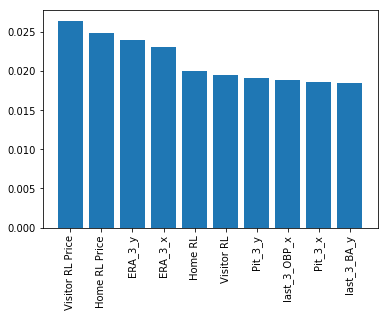

In [242]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
# %matplotlib inline
# # Creating a bar plot
# sns.barplot(x=feature_import)
# # Add labels to your graph
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.legend()
# plt.show()

feature_import.sort(key=lambda x: x[1], reverse=True)
feature_import = feature_import[:10]
plt.bar(*zip(*feature_import))
plt.xticks(rotation='vertical')

In [ ]:
clf.predict()